# UNAD
## Jhon William Rojas Silva
## Predicción sobrevivientes Titanic con Regresión Logística

## Pasos de la Actividad
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo
5. Entrenar el modelo configurando los diferentes hiperparámetros
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [1]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías para implementar modelos de ciencia de datos
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# lectura de datos en Python y lo cargamos en la variable Datos

Data = pd.read_csv('./Titanic-Dataset.csv')

In [5]:
# Realizamos lectura de los Datos para el análisis exploratorio

Data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
# Descripción de los datos
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

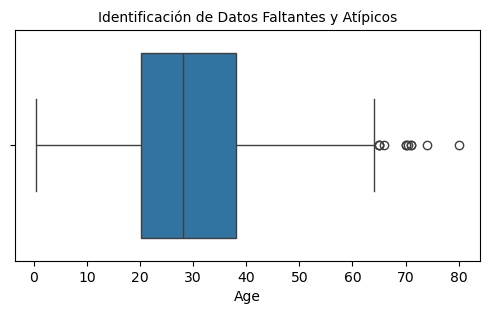

In [9]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [11]:
# Verificamos datos nulos
Data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
Data['Age'] = Data['Age'].fillna(Data['Age'].mean())
Data['Embarked'] = Data['Embarked'].fillna(Data['Embarked'].mode()[0])

In [15]:
# Llenar con una categoría 'Unknown'
Data['Cabin'] = Data['Cabin'].fillna('Unknown')

In [17]:
# Verificamos datos nulos
Data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

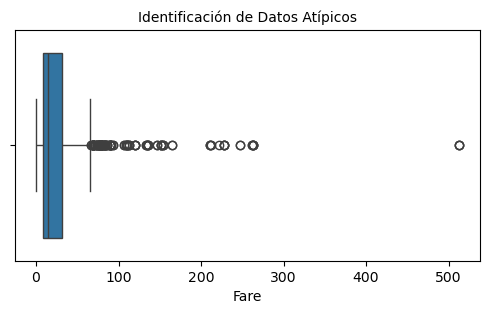

In [19]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Fare'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

No se realiza imputación en los valores atípicos de edad y tarifa, ya que considero importantes esos datos a la hora de sobrevivir y como se relaciona la edad y la posibilidad de viajar en mejores condiciones influyen en haber sobrevivido.

## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Característica de interes:

Sobrevivió: si la persona sobrevivió o no (0 = no sobrevivió - 1 = sobrevivió)
Predecir si una persona tiene posibilidades de sobrevivir

In [21]:
# Total de sobrevivientes

Data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [23]:
Data[['Survived']].head(10)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [25]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Data.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna Survived 
Y = Data['Survived'] # Se cargan los datos de train con los datos de la la columna Survived

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [27]:
# Eliminar columnas que no son útiles para el modelo
X_train = X_train.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
X_test = X_test.drop(['Name', 'Ticket', 'Cabin','Embarked'], axis=1)

In [29]:
# Crear y ajustar el codificador
label_encoder = LabelEncoder()
label_encoder.fit(X_train['Sex'])

# Ver las categorías y su mapeo
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'female': 0, 'male': 1}


In [31]:
# Codificar columnas categóricas
label_encoder = LabelEncoder()
X_train['Sex'] = label_encoder.fit_transform(X_train['Sex'])
X_test['Sex'] = label_encoder.transform(X_test['Sex'])

In [33]:
print (X_train)

     PassengerId  Pclass  Sex        Age  SibSp  Parch     Fare
671          672       1    1  31.000000      1      0  52.0000
417          418       2    0  18.000000      0      2  13.0000
634          635       3    0   9.000000      3      2  27.9000
323          324       2    0  22.000000      1      1  29.0000
379          380       3    1  19.000000      0      0   7.7750
..           ...     ...  ...        ...    ...    ...      ...
131          132       3    1  20.000000      0      0   7.0500
490          491       3    1  29.699118      1      0  19.9667
528          529       3    1  39.000000      0      0   7.9250
48            49       3    1  29.699118      2      0  21.6792
80            81       3    1  22.000000      0      0   9.0000

[668 rows x 7 columns]


In [35]:
print (Y_train)

671    0
417    1
634    0
323    1
379    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 668, dtype: int64


## 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [37]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [39]:
print (Y_test)

288    1
869    1
182    0
684    0
599    1
      ..
882    0
434    0
304    0
500    0
633    0
Name: Survived, Length: 223, dtype: int64


In [41]:
print (Prediccion)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0
 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0]


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [44]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       137
           1       0.77      0.64      0.70        86

    accuracy                           0.79       223
   macro avg       0.79      0.76      0.77       223
weighted avg       0.79      0.79      0.78       223



## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

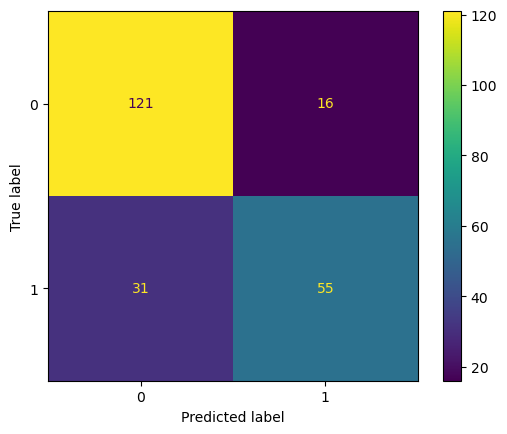

In [47]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

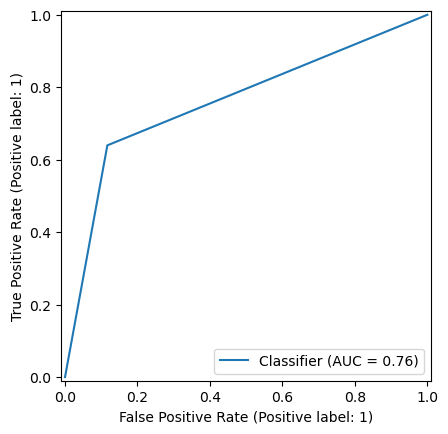

In [49]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos

###### Modelo de Regresión Logística:
La matriz de confusión obtenida del modelo de regresión logística muestra lo siguiente:
	Verdaderos negativos: 121 personas que no sobrevivieron fueron clasificadas correctamente como no sobrevivientes.
	Falsos positivos: 31 personas que no sobrevivieron fueron clasificadas incorrectamente como sobrevivientes.
	Falsos negativos: 16 personas que sobrevivieron fueron clasificadas incorrectamente como no sobrevivientes.
	Verdaderos positivos: 55 personas que sobrevivieron fueron clasificadas correctamente como sobrevivientes.

###### Métricas derivadas:
- Precisión para la clase 0 (No sobrevivió): 80%
- Precisión para la clase 1 Sobrevivió): 77%
Esto indica que el modelo tiene una buena capacidad para predecir correctamente tanto la clase positiva (77%) como la clase negativa (80%).

###### Curva ROC:
La curva ROC del modelo tiene un AUC de 0.76, lo que indica un buen rendimiento del modelo para separar las clases (sobrevive o no).
Reporte de Clasificación (Precision, Recall y F1-score)
A partir del reporte de clasificación, obtenemos las siguientes métricas clave para ambas clases:
Métrica:
Clase 0 (No sobrevivió):
	Precisión: 0.80
	Recall: 0.88
	F1-Score: 0.84
Clase 1 (Sobrevivió):
	Precisión: 0.77
	Recall: 0.64
	F1-Score: 0.70
 
###### Recall:
De todas las personas que realmente no sobrevivieron, el modelo identificó correctamente el 88% de ellas.
De todas las personas que realmente sobrevivieron, el modelo identificó correctamente el 64% de ellas. Este valor es más bajo en comparación con la clase 0, lo que indica que el modelo tiene más dificultades para identificar a los sobrevivientes.
###### F1-Score:
Con un valor de 0.84 muestra un balance general para esta clase. Indica que el modelo tiene un buen rendimiento para identificar a los que no sobrevivieron.
Con un valor de 0.70, indica un equilibrio entre precisión y recall, algo menor que para la clase 0, reflejando que el modelo tiene un rendimiento moderado al clasificar a los sobrevivientes